<a href="https://colab.research.google.com/github/Ankit123trk/Advance-Artificial-Intelligence-practical-/blob/main/block_word_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

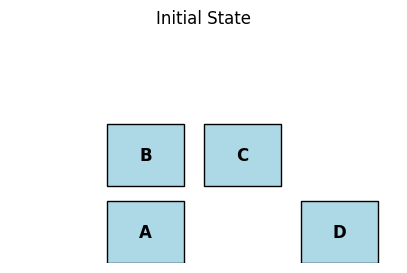

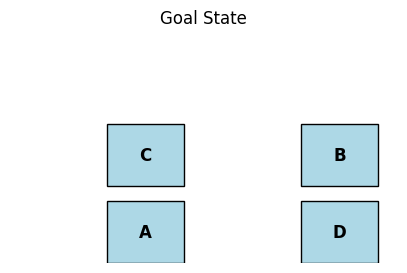

In [1]:
import matplotlib.pyplot as plt

# Define initial and goal states
initial_state = {
    "on": {"B": "A"},  # B is on A
    "ontable": {"A", "C", "D"},  # A, C, and D are on the table
    "clear": {"B", "C", "D"},  # Top of B, C, and D are clear
}

goal_state = {
    "on": {"C": "A", "B": "D"},  # C on A, B on D
    "ontable": {"A", "D"},  # A and D are on the table
    "clear": {"B", "C"},  # Top of B and C are clear
}

# Plan: Move B to table, Move C to A, Move B to D
actions = [
    ("unstack", "B", "A"),
    ("putdown", "B"),
    ("pickup", "C"),
    ("stack", "C", "A"),
    ("pickup", "B"),
    ("stack", "B", "D"),
]

# Visualization Function
def draw_blocks(state, title):
    fig, ax = plt.subplots(figsize=(5, 3))
    ax.set_xlim(-1, 3)
    ax.set_ylim(0, 3)
    ax.axis("off")

    positions = {"A": (0, 0), "B": (0, 1), "C": (1, 1), "D": (2, 0)}

    # Adjust positions based on state
    for block in state["on"]:
        below = state["on"][block]
        positions[block] = (positions[below][0], positions[below][1] + 1)

    for block, (x, y) in positions.items():
        ax.add_patch(plt.Rectangle((x, y), 0.8, 0.8, fill=True, edgecolor="black", facecolor="lightblue"))
        ax.text(x + 0.4, y + 0.4, block, ha="center", va="center", fontsize=12, fontweight="bold")

    ax.set_title(title, fontsize=12)
    plt.show()

# Show initial state
draw_blocks(initial_state, "Initial State")

# Execute actions
current_state = initial_state.copy()
for action in actions:
    if action[0] == "unstack":
        _, block, below = action
        current_state["clear"].add(below)
        current_state["clear"].remove(block)
        current_state["on"].pop(block)
        current_state["ontable"].add(block)

    elif action[0] == "putdown":
        _, block = action
        current_state["ontable"].add(block)
        current_state["clear"].add(block)

    elif action[0] == "pickup":
        _, block = action
        current_state["ontable"].remove(block)
        current_state["clear"].remove(block)

    elif action[0] == "stack":
        _, block, target = action
        current_state["on"][block] = target
        current_state["clear"].remove(target)
        current_state["clear"].add(block)

# Show goal state
draw_blocks(goal_state, "Goal State")
